In [1]:
#fertility rate import
import pandas as pd

# Specify the path to the specific CSV file
file_path = "un_totalfertrate.csv"

# Read the CSV file into a DataFrame
df_fertrate = pd.read_csv(file_path)

df_fertrate

,Location,Value
0,Afghanistan,7.575834
1,Afghanistan,7.631177
2,Afghanistan,7.703147
3,Afghanistan,7.761403
4,Afghanistan,7.767028
...,...,...
9671,Zambia,3.91033
9672,Zambia,3.848741
9673,Zambia,3.772583
9674,Zambia,3.722541


In [2]:
#there are multiple enteries for fertility rates - we just need one value for each country
# Convert "Value" to numeric (handling errors if needed)
df_fertrate['Value'] = pd.to_numeric(df_fertrate['Value'], errors='coerce')

# Group by "Location" and calculate the mean (now numeric-safe)
av_fert_df = df_fertrate.groupby('Location', as_index=False)['Value'].mean()

av_fert_df.rename(columns={'Value': 'Fertility Rate'}, inplace=True)

av_fert_df

,Location,Fertility Rate
0,Afghanistan,6.213781
1,Albania,1.837114
2,Algeria,2.964851
3,American Samoa,3.233255
4,Andorra,1.214757
...,...,...
231,Wallis and Futuna Islands,2.280540
232,Western Sahara,2.908302
233,Yemen,5.521480
234,Zambia,5.165913


In [3]:
#import literacy rates
import pandas as pd

# Specify the path to the Excel file
file_path = "lit_rate_tidy.xlsx"

# Read the Excel file into a DataFrame
df_litrate = pd.read_excel(file_path)  

df_litrate

,Country,literacy
0,Aruba,97.989998
1,Afghanistan,37.000000
2,Angola,72.400002
3,Albania,98.500000
4,Andorra,100.000000
...,...,...
209,Kosovo,96.600000
210,Yemen,70.000000
211,South Africa,90.000000
212,Zambia,87.500000


In [4]:
# import HDI
import pandas as pd

# Specify the path to the Excel file
file_path = "HDI_tidy.xlsx"

# Read the Excel file into a DataFrame
df_HDI= pd.read_excel(file_path)  

df_HDI.rename(columns={'HDI Value': 'HDI'}, inplace=True)

df_HDI

,HDI rank,Country,HDI
0,1,Switzerland,0.967
1,2,Norway,0.966
2,3,Iceland,0.959
3,4,"Hong Kong, China (SAR)",0.956
4,5,Denmark,0.952
...,...,...,...
188,189,Chad,0.394
189,189,Niger,0.394
190,191,Central African Republic,0.387
191,192,South Sudan,0.381


In [5]:
#merge dataframes
av_fert_df = av_fert_df.rename(columns={'Location': 'Country'})

merged_df = (
    av_fert_df
    .merge(df_litrate, on='Country', how='outer')
    .merge(df_HDI, on='Country', how='outer')
)

merged_df['Country'] = merged_df['Country'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

merged_df



,Country,Fertility Rate,literacy,HDI rank,HDI
0,Afghanistan,6.213781,37.000000,182.0,0.462
1,Albania,1.837114,98.500000,74.0,0.789
2,Algeria,2.964851,81.407837,93.0,0.745
3,American Samoa,3.233255,97.000000,NaN,NaN
4,Andorra,1.214757,100.000000,35.0,0.884
...,...,...,...,...,...
273,Wallis and Futuna Islands,2.280540,NaN,NaN,NaN
274,Western Sahara,2.908302,NaN,NaN,NaN
275,Yemen,5.521480,70.000000,186.0,0.424
276,Zambia,5.165913,87.500000,153.0,0.569


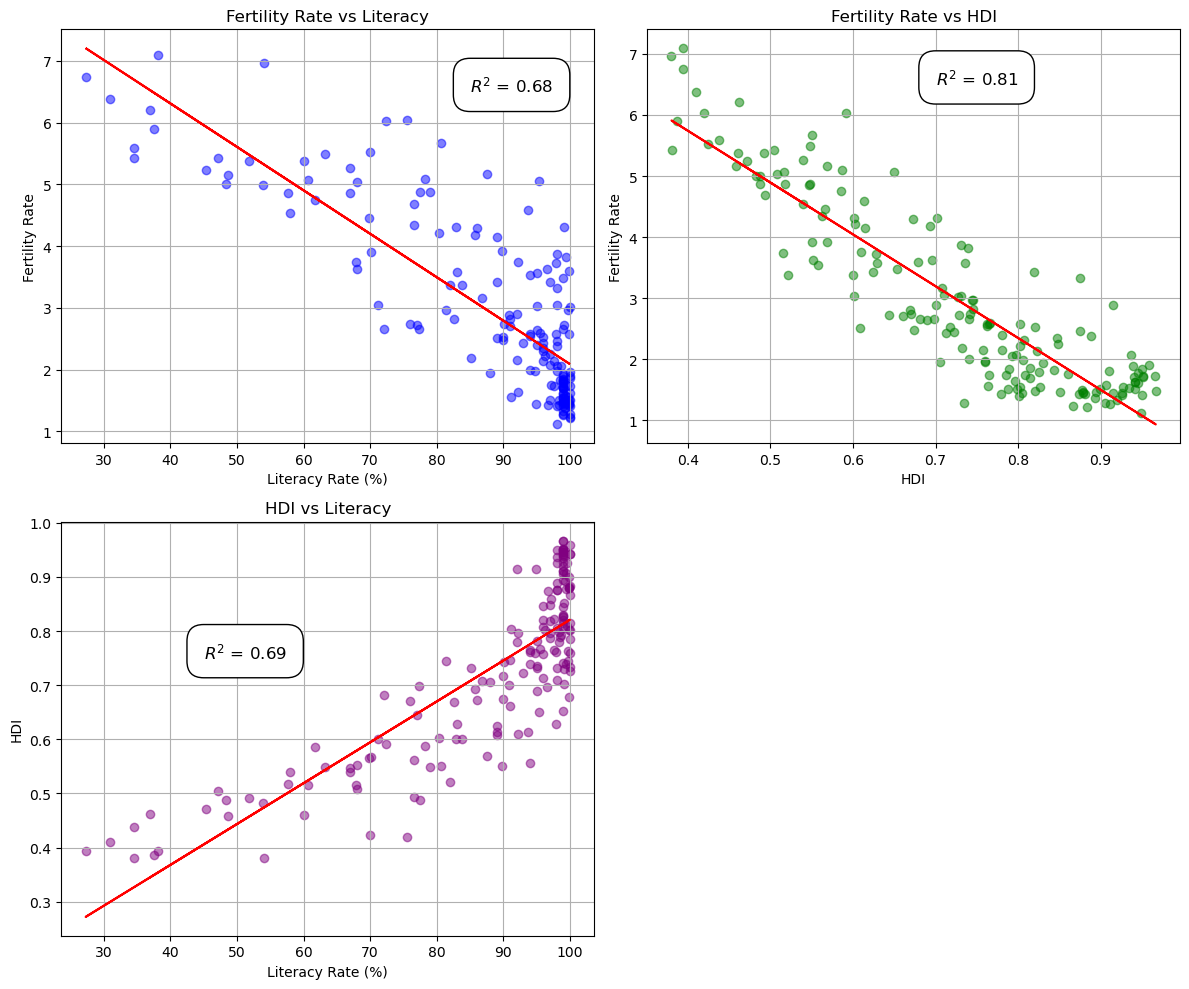

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Drop rows with NaN values in 'Fertility Rate', 'literacy', or 'HDI'
merged_df_clean = merged_df.dropna(subset=['Fertility Rate', 'literacy', 'HDI'])

# Perform linear regression for Fertility Rate vs Literacy
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(merged_df_clean['literacy'], merged_df_clean['Fertility Rate'])
fit_line1 = slope1 * merged_df_clean['literacy'] + intercept1

# Perform linear regression for Fertility Rate vs HDI
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(merged_df_clean['HDI'], merged_df_clean['Fertility Rate'])
fit_line2 = slope2 * merged_df_clean['HDI'] + intercept2

# Perform linear regression for HDI vs Literacy
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(merged_df_clean['literacy'], merged_df_clean['HDI'])
fit_line3 = slope3 * merged_df_clean['literacy'] + intercept3

# Plotting
plt.figure(figsize=(12, 10))

# Plot 1: Fertility Rate vs Literacy
plt.subplot(2, 2, 1)
plt.scatter(merged_df_clean['literacy'], merged_df_clean['Fertility Rate'], c='blue', alpha=0.5)
plt.plot(merged_df_clean['literacy'], fit_line1, color='red')
plt.title('Fertility Rate vs Literacy')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Fertility Rate')
r_squared1 = r_value1**2
plt.text(85, 6.5, f'$R^2$ = {r_squared1:.2f}', 
         fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(True)

# Plot 2: Fertility Rate vs HDI
plt.subplot(2, 2, 2)
plt.scatter(merged_df_clean['HDI'], merged_df_clean['Fertility Rate'], c='green', alpha=0.5)
plt.plot(merged_df_clean['HDI'], fit_line2, color='red')
plt.title('Fertility Rate vs HDI')
plt.xlabel('HDI')
plt.ylabel('Fertility Rate')
r_squared2 = r_value2**2
plt.text(0.7, 6.5, f'$R^2$ = {r_squared2:.2f}', 
         fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(True)

# Plot 3: HDI vs Literacy
plt.subplot(2, 2, 3)
plt.scatter(merged_df_clean['literacy'], merged_df_clean['HDI'], c='purple', alpha=0.5)
plt.plot(merged_df_clean['literacy'], fit_line3, color='red')
plt.title('HDI vs Literacy')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('HDI')
r_squared3 = r_value3**2
plt.text(45, 0.75, f'$R^2$ = {r_squared3:.2f}', 
         fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
